In [316]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df=pd.read_excel("/content/mymoviedb.xlsx")
print(df.head())


  Release_Date                    Title  \
0   2021-12-15  Spider-Man: No Way Home   
1   2022-03-01               The Batman   
2   2022-02-25                  No Exit   
3   2021-11-24                  Encanto   
4   2021-12-22           The King's Man   

                                            Overview  Popularity  Vote_Count  \
0  Peter Parker is unmasked and no longer able to...    5083.954        8940   
1  In his second year of fighting crime, Batman u...    3827.658        1151   
2  Stranded at a rest stop in the mountains durin...    2618.087         122   
3  The tale of an extraordinary family, the Madri...    2402.201        5076   
4  As a collection of history's worst tyrants and...    1895.511        1793   

   Vote_Average Original_Language                               Genre  \
0           8.3                en  Action, Adventure, Science Fiction   
1           8.1                en            Crime, Mystery, Thriller   
2           6.3                en        

In [318]:
#for getting information about the genre of the movies
df["Genre"].head()

,Genre
0,"Action, Adventure, Science Fiction"
1,"Crime, Mystery, Thriller"
2,Thriller
3,"Animation, Comedy, Family, Fantasy"
4,"Action, Adventure, Thriller, War"


In [319]:
#for checking if there is any duplicate movie
df.duplicated().sum()

np.int64(0)

In [320]:
#using describe function for performing statesticals operations
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000



* Summary of the project

*   We have a dataframe consisting of 9827 rows and 9 np.column
*   Our dataset looks a bit tidy with no NaNs nor duplicated values.
*   Release_date columns needs to be castes into date time and to extract only the year value.
*  There is noticable outliers in Popolarity column.
*  Vote_Average better be categorised for proper analysis.
*  Genre column has come saperated values and white spaces that needs to be handled and casted into category.






In [321]:
#now we're changing the data type of release date(object into dateandtime)
df["Release_Date"]=pd.to_datetime(df["Release_Date"])
print(df["Release_Date"].dtypes)

datetime64[ns]


In [322]:
#now we're going to drop date and month from release date
df["Release_Date"] = df["Release_Date"].dt.year
print(df["Release_Date"].dtypes)


int32


In [323]:
print(df.head())

   Release_Date                    Title  \
0          2021  Spider-Man: No Way Home   
1          2022               The Batman   
2          2022                  No Exit   
3          2021                  Encanto   
4          2021           The King's Man   

                                            Overview  Popularity  Vote_Count  \
0  Peter Parker is unmasked and no longer able to...    5083.954        8940   
1  In his second year of fighting crime, Batman u...    3827.658        1151   
2  Stranded at a rest stop in the mountains durin...    2618.087         122   
3  The tale of an extraordinary family, the Madri...    2402.201        5076   
4  As a collection of history's worst tyrants and...    1895.511        1793   

   Vote_Average Original_Language                               Genre  \
0           8.3                en  Action, Adventure, Science Fiction   
1           8.1                en            Crime, Mystery, Thriller   
2           6.3                en  

In [325]:
#now dropping columns
cols=["Overview","Original_Language","Poster_Url"]




>

>









In [324]:
df.drop(cols,axis=1,inplace=True)
df.columns
#as we can see Overview,Original_Language,Poster_Url has been drooped from the columns list

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [326]:
print(df.head())

   Release_Date                    Title  Popularity  Vote_Count  \
0          2021  Spider-Man: No Way Home    5083.954        8940   
1          2022               The Batman    3827.658        1151   
2          2022                  No Exit    2618.087         122   
3          2021                  Encanto    2402.201        5076   
4          2021           The King's Man    1895.511        1793   

   Vote_Average                               Genre  
0           8.3  Action, Adventure, Science Fiction  
1           8.1            Crime, Mystery, Thriller  
2           6.3                            Thriller  
3           7.7  Animation, Comedy, Family, Fantasy  
4           7.0    Action, Adventure, Thriller, War  


In [327]:
# Creating the function
def categorize_col(df, col, labels):
    edges = [
        df[col].describe()["min"],
        df[col].describe()["25%"],
        df[col].describe()["50%"],
        df[col].describe()["75%"],
        df[col].describe()["max"]
    ]

    df[col] = pd.cut(df[col], edges, labels=labels, duplicates="drop")
    return df


**Categorizing Vote_Average column**

we should cut the Vote_Average values and make 4 categories **popular**,**average**,**below_avg**,**not_popular** to describe it using categorize_col() function provided above

In [328]:
#defining labels s
labels = ["not_popular", "below_average", "average", "popular"]
#calling the function
categorize_col(df, "Vote_Average", labels)

print(df["Vote_Average"].unique())



['popular', 'below_average', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_average' < 'average' < 'popular']


In [329]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_average,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [330]:
#for checking how many movies fall under the category of popular,not popular,average,below average
df["Vote_Average"].value_counts()

,count
Vote_Average,
not_popular,2467
popular,2450
average,2412
below_average,2398


In [331]:
#dropping all the duplicate and null values
df.dropna(inplace=True)

#checking if there is any NaN values remaining or not
df.isna().sum()

,0
Release_Date,0
Title,0
Popularity,0
Vote_Count,0
Vote_Average,0
Genre,0


In [332]:
print(df.head(5))

   Release_Date                    Title  Popularity  Vote_Count  \
0          2021  Spider-Man: No Way Home    5083.954        8940   
1          2022               The Batman    3827.658        1151   
2          2022                  No Exit    2618.087         122   
3          2021                  Encanto    2402.201        5076   
4          2021           The King's Man    1895.511        1793   

    Vote_Average                               Genre  
0        popular  Action, Adventure, Science Fiction  
1        popular            Crime, Mystery, Thriller  
2  below_average                            Thriller  
3        popular  Animation, Comedy, Family, Fantasy  
4        average    Action, Adventure, Thriller, War  


**We'd spit genres into a list and then explode our dataframe to have only one genre per row for each movie**

In [333]:
df["Genre"]=df["Genre"].str.split(", ")
df=df.explode("Genre").reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [334]:
#cast into category
df["Genre"]=df["Genre"].astype("category")
df["Genre"].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [335]:
#as we have seperated genre of movies so now the number of data will also increase
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 749.6+ KB


In [336]:
#now for checking number of unique values in each columns
df.nunique()

,0
Release_Date,100
Title,9415
Popularity,8088
Vote_Count,3265
Vote_Average,4
Genre,19


In [337]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


**Data Visualizationt**

In [338]:
#setting whitegrib
sns.set_style(style="whitegrid")

**#Now we're going to solve question**
**1. What is the most frequent genre of movies released on Netflix?**

In [339]:
df["Genre"].describe()

,Genre
count,25552
unique,19
top,Drama
freq,3715


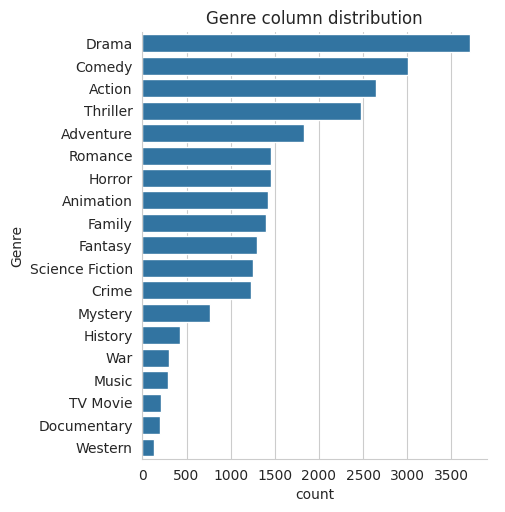

In [341]:
sns.catplot(y="Genre",data=df,kind="count",order=df["Genre"].value_counts().index)
plt.title("Genre column distribution")
plt.show()

**Que2.Which has highest votes in vote avg column?**

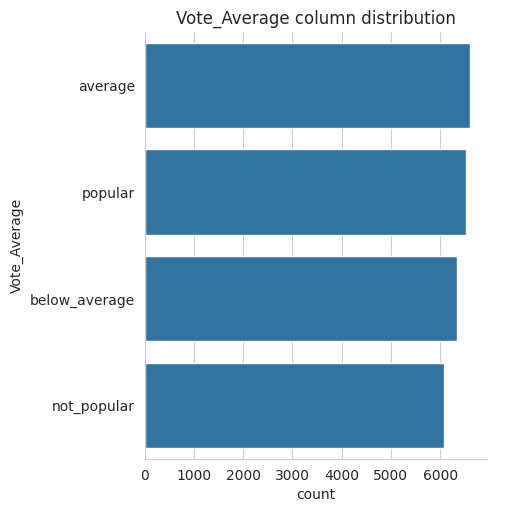

In [342]:
sns.catplot(y="Vote_Average",data=df,kind="count",order=df["Vote_Average"].value_counts().index)
plt.title("Vote_Average column distribution")
sns.set_style(style="darkgrid")
plt.show()

**Que3. What movie got the highest popularity?what's its genre?**

In [343]:
df[df["Popularity"]==df["Popularity"].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


**Que3. What movie got the lowest popularity?what's its genre?**

In [344]:
df[df["Popularity"]==df["Popularity"].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,average,History
25549,1984,Threads,13.354,186,popular,War
25550,1984,Threads,13.354,186,popular,Drama
25551,1984,Threads,13.354,186,popular,Science Fiction


**Which year has the most filmmed movies?**

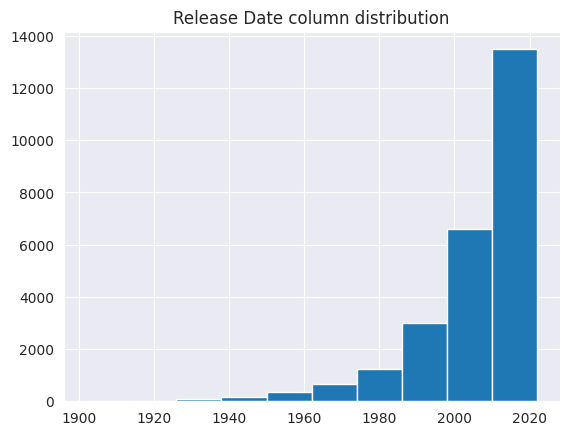

In [345]:
df["Release_Date"].hist()
plt.title("Release Date column distribution")
plt.show()

Conclusion

*que1. What is the most frequent genre of movies released on Netflix?  
Ans-Drama genre is the most frequent genre in our dataset and has appeared more than 14% of other genre.

*Que2.Which has highest votes in vote
avg column?    
Ans-We have 25% of our dataset with popular vote.
  

*Que3. What movie got the highest popularity?what's its genre?    
Ans-Spider-Man :No Way Home and it has  genres of Action,Adventure and Fiction.

*Que4. What movie got the lowest popularity?what's its genre?  
Ans-The united states,thread has the lowest popuparity and it has genre of music,drama.

*Que5.Which year has the most filmmed movies?   
Ans-2020  






